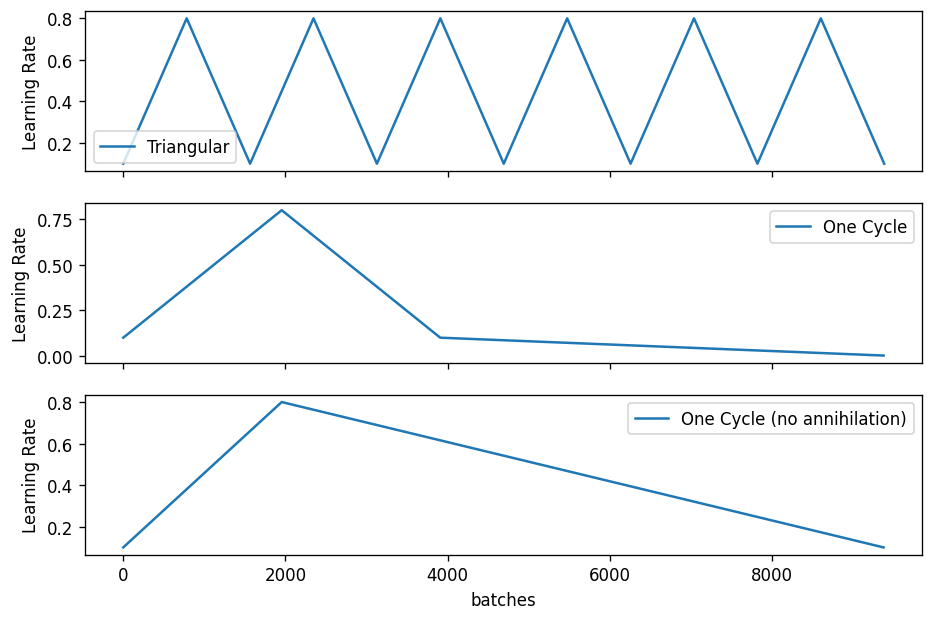

In [1]:
import matplotlib.pyplot as plt
import numpy as np

epochs = 24
batchsize = 128
maxatepoch = 5
lrmin = 0.1
lrmax = 0.8
trainlen = 50000

def getiters(datasize, batchsize):
  l = datasize//batchsize
  if datasize%batchsize:
    l += 1
  return l


def plotcycles(epochs, batchsize, maxatepoch, lrmin, lrmax, trainlen):
  plt.rcParams.update({'figure.figsize':(9,6), 'figure.dpi':120})
  fig, axes = plt.subplots(3, 1, sharex="col")

  stepsize = 2*getiters(trainlen, batchsize)
  x = np.linspace(lrmin, lrmax, stepsize)
  x = np.concatenate((x, x[::-1]), axis=None)
  xtriangular = x
  for i in range(1, epochs//4): # since a step is 2 epochs, we have consumed 4 epochs in one triangle
    xtriangular = np.concatenate((xtriangular, x), axis=None)
  axes[0].plot(xtriangular, label='Triangular')
  axes[0].set_ylabel('Learning Rate')
  axes[0].legend(('Triangular',))

  niters = getiters(maxatepoch*trainlen, batchsize)
  annealingepochs = epochs - 2*maxatepoch
  annealingiters = getiters(annealingepochs*trainlen, batchsize)

  x = np.linspace(lrmin, lrmax, niters)
  onecycle =  np.concatenate((x, x[::-1], np.linspace(lrmin, lrmin/50, annealingiters)), axis=None)
  axes[1].plot(onecycle, label='One Cycle')
  axes[1].set_ylabel('Learning Rate')
  axes[1].legend(('One Cycle',))

  onecycle2 =  np.concatenate((x, np.linspace(lrmax, lrmin, getiters((epochs - maxatepoch)*trainlen, batchsize))), axis=None)
  axes[2].plot(onecycle2, label='One Cycle')
  axes[2].set_ylabel('Learning Rate')
  axes[2].set_xlabel('batches')
  axes[2].legend(('One Cycle (no annihilation)',))

  plt.show()

plotcycles(epochs, batchsize, maxatepoch, lrmin, lrmax, trainlen)